# Inleiding

In deze fase van de data-analyse minor hebben we een grondige verkenning gemaakt van de dataset over studentenprestaties en hebben we fundamentele concepten van regressieanalyse toegepast. Onze aannames en conclusies uit eerdere analyses zullen nu als leidraad dienen voor een meer geavanceerde regressieanalyse op de complete dataset. Het doel is om geavanceerde technieken en modellen toe te passen en dieper in te gaan op de complexe relaties tussen variabelen. Laten we onze eerdere inzichten gebruiken als basis om een dieper begrip te krijgen van hoe verschillende factoren de eindexamenscores beïnvloeden en om geavanceerde regressiemodellen te evalueren.

# Data Preparation and Exploration

In deze fase van de analyse zal ik me richten op gegevensvoorbereiding en -verkenning. Dit omvat het verder onderzoeken en voorbereiden van de dataset over studentenprestaties, waarbij ik me zal concentreren op het identificeren en aanpakken van eventuele ontbrekende gegevens, het omgaan met categorische variabelen en het optimaliseren van de dataset voor geavanceerde regressieanalyse. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import f_oneway

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA

In [2]:
student_performance_GV_data = pd.read_csv("student_performance_gevorderd.csv")
student_performance_GV_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,3,2,2,3,3,10,7,8,10,mat
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,2,2,1,1,5,2,15,14,15,mat
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,3,2,1,2,5,4,6,10,10,mat
5,GP,M,16.0,U,LE3,T,4.0,3.0,services,other,...,4,2,1,2,5,10,15,15,15,mat
6,GP,M,16.0,U,LE3,T,2.0,2.0,other,other,...,4,4,1,1,3,0,12,12,11,mat
7,GP,F,17.0,U,GT3,A,4.0,4.0,other,teacher,...,1,4,1,1,1,6,6,5,6,mat
8,GP,M,15.0,U,LE3,A,3.0,2.0,services,other,...,2,2,1,1,1,0,16,18,19,mat
9,GP,M,15.0,U,GT3,T,3.0,4.0,other,other,...,5,1,1,1,5,0,14,15,15,mat


In [3]:
student_performance_GV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1023 non-null   float64
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1016 non-null   float64
 7   Fedu        1016 non-null   float64
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    971 non-null    object 
 12  traveltime  1044 non-null   int64  
 13  studytime   1044 non-null   int64  
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non-null  

We hebben de juiste informatie over de data. Nu ga ik de data scheiden in 3 lijsten

In [4]:
afhankelijk_var = ["G1", "G2", "G3"]
categorisch_var = ["address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "guardian", "traveltime", "studytime", "schoolsup", "paid", "activities", "nursery", "higher", "internet", "romantic", "school", "sex", "course"] 
numeriek_var = ["age", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences"]

Voordat we verder gaan is het belangrijk om te kijken of de data geen missing values heeft. 

In [5]:
student_performance_GV_data.isnull().sum()

school         0
sex            0
age           21
address        0
famsize        0
Pstatus        0
Medu          28
Fedu          28
Mjob           0
Fjob           0
reason         0
guardian      73
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1             0
G2             0
G3             0
course         0
dtype: int64

In [6]:
nullable_variables = ["age", "Medu", "Fedu", "guardian"]
not_nullable_variables = [var for var in student_performance_GV_data.columns if var not in nullable_variables]

class MissingValuesImputer(BaseEstimator, TransformerMixin):
    def __init__(self, nullable_vars, not_nullable_vars):
        self.nullable_vars = nullable_vars
        self.not_nullable_vars = not_nullable_vars
        self.age_mean = None
        self.medu_mode = None
        self.fedu_mode = None
        self.guardian_mode = None

    def fit(self, X, y=None):
        self.age_mean = X["age"].mean()
        self.medu_mode = X["Medu"].mode()[0]
        self.fedu_mode = X["Fedu"].mode()[0]
        self.guardian_mode = X["guardian"].mode()[0]

        return self

    def transform(self, X, y=None):
        X["age"].fillna(self.age_mean, inplace=True)
        X["Medu"].fillna(self.medu_mode, inplace=True)
        X["Fedu"].fillna(self.fedu_mode, inplace=True)
        X["guardian"].fillna(self.guardian_mode, inplace=True)

        return X

missing_values_imputer = MissingValuesImputer(nullable_vars=nullable_variables, not_nullable_vars=not_nullable_variables)
student_performance_GV_data_notNull = missing_values_imputer.fit_transform(student_performance_GV_data.copy())

In [7]:
print("Ontbrekende waarden in X na imputatie:")
print(student_performance_GV_data_notNull.isnull().sum())

Ontbrekende waarden in X na imputatie:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
course        0
dtype: int64


Na het uitvoeren van de vorige script is het nu gelukt om de missing values te vullen met data. De MissingValuesImputer klasse die ik heb gemaakt, behandelt ontbrekende waarden in specifieke variabelen van een dataset. Bij het instellen krijgt de klasse de lijsten nullable_vars en not_nullable_vars. In de fit-methode bereken ik statistische parameters zoals het gemiddelde en de modus op basis van niet-ontbrekende waarden van geselecteerde variabelen. Vervolgens gebruik ik deze parameters in de transform-methode om ontbrekende waarden in te vullen. Het resultaat is een dataset waarin ontbrekende waarden zijn aangepakt door ze te imputeren met statistisch afgeleide waarden.

Om verder te werken met de data is het belangrijk dat alle variabelen dezelfde datatype hebben. Ik ga dus nu alles omzetten naar Integer.

In [8]:
class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_encoders = {}

    def fit(self, X, y=None):
        for column in X.select_dtypes(include=['object']).columns:
            if X[column].isnull().any():
                raise ValueError(f"Column '{column}' contains missing values. Impute or remove missing values before encoding.")
            
            le = LabelEncoder()
            le.fit(X[column])
            self.label_encoders[column] = le
        return self

    def transform(self, X):
        X_encoded = X.copy()
        for column, le in self.label_encoders.items():
            X_encoded[column] = le.transform(X[column])
        return X_encoded

In [9]:
custom_encoder = CustomLabelEncoder()  
custom_encoder.fit(student_performance_GV_data_notNull)

encoded_data = custom_encoder.transform(student_performance_GV_data_notNull)  

encoded_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,0,0,18.0,1,0,0,4.0,4.0,0,4,...,3,4,1,1,3,6,5,6,6,0
1,0,0,17.0,1,0,1,1.0,1.0,0,2,...,3,3,1,1,3,4,5,5,6,0
2,0,0,15.0,1,1,1,1.0,1.0,0,2,...,3,2,2,3,3,10,7,8,10,0
3,0,0,15.0,1,0,1,4.0,2.0,1,3,...,2,2,1,1,5,2,15,14,15,0
4,0,0,16.0,1,0,1,3.0,3.0,2,2,...,3,2,1,2,5,4,6,10,10,0
5,0,1,16.0,1,1,1,4.0,3.0,3,2,...,4,2,1,2,5,10,15,15,15,0
6,0,1,16.0,1,1,1,2.0,2.0,2,2,...,4,4,1,1,3,0,12,12,11,0
7,0,0,17.0,1,0,0,4.0,4.0,2,4,...,1,4,1,1,1,6,6,5,6,0
8,0,1,15.0,1,1,0,3.0,2.0,3,2,...,2,2,1,1,1,0,16,18,19,0
9,0,1,15.0,1,0,1,3.0,4.0,2,2,...,5,1,1,1,5,0,14,15,15,0


In de table hierboven is te zien dat alle string datatype omgezet is naar integer

# Advanced Regression Models


In deze fase van het onderzoek worden geavanceerde regressiemodellen geïntroduceerd, waaronder polynomiale regressie, ridge-regressie, lasso-regressie en elastische netto-regressie. De nadruk ligt op het verkennen van niet-lineaire relaties en interacties tussen variabelen, waardoor we dieper ingaan op de complexiteit van het voorspellingsmodel.







In [10]:
X = encoded_data.drop('G3', axis=1) 
y = encoded_data['G3']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_poly_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_elasticnet = elasticnet_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)

print(f"Mean Squared Error (Poly): {mse_poly}")
print(f"Mean Squared Error (Ridge): {mse_ridge}")
print(f"Mean Squared Error (Lasso): {mse_lasso}")
print(f"Mean Squared Error (Elastic Net): {mse_elasticnet}")

Mean Squared Error (Poly): 9.809567274926026
Mean Squared Error (Ridge): 2.99650653437356
Mean Squared Error (Lasso): 3.0679647949181894
Mean Squared Error (Elastic Net): 3.089523524953115


Uit de Mean Squared Error (MSE) resultaten van de verschillende regressiemodellen kunnen we enkele conclusies trekken:

##### Polynomial Regression MSE: 10.47
Polynomial Regression heeft de hoogste MSE, wat kan duiden op overpassing (overfitting) van het model. Het model past mogelijk te goed op de trainingsgegevens, maar generaliseert minder goed naar nieuwe gegevens.

##### Ridge Regression MSE: 2.99
Ridge Regression heeft de laagste MSE, wat aangeeft dat het model beter presteert dan het lineaire model. De regularisatie van Ridge helpt overpassing te verminderen door de coëfficiënten te beperken.

##### Lasso Regression MSE: 3.07
Lasso Regression heeft een iets hogere MSE dan Ridge, maar nog steeds lager dan de Polynomial Regression. Lasso voert variabelenselectie uit, wat kan helpen bij het verminderen van de complexiteit van het model.

##### Elastic Net Regression MSE: 3.09
Elastic Net combineert kenmerken van zowel Ridge als Lasso. Het presteert vergelijkbaar met Lasso en biedt een evenwicht tussen regularisatie en variabelenselectie.

Conclusie: Ridge Regression lijkt het beste te presteren op basis van de MSE-waarde, waardoor het een geschikte keuze is voor dit regressieprobleem. Het is echter essentieel om de resultaten te interpreteren met inachtneming van de specifieke doelstellingen van je model en de aard van de gegevens.

# Model Selection and Evaluation

In deze fase van de analyse gaan we dieper in op geavanceerde technieken voor modelselectie, met name gericht op stapsgewijze regressie. Stapsgewijze regressie is een systematische methode om de meest relevante variabelen in een voorspellend model te selecteren, wat helpt bij het optimaliseren van de prestaties en interpreteerbaarheid van het model. Daarnaast zullen we robuuste strategieën voor model evaluatie toepassen, zoals k-fold cross-validation en leercurves.

Cross-Validation Scores: [0.82516983 0.75256188 0.83852551 0.91707696 0.86273778]
Mean CV Score: 0.8392143925542779


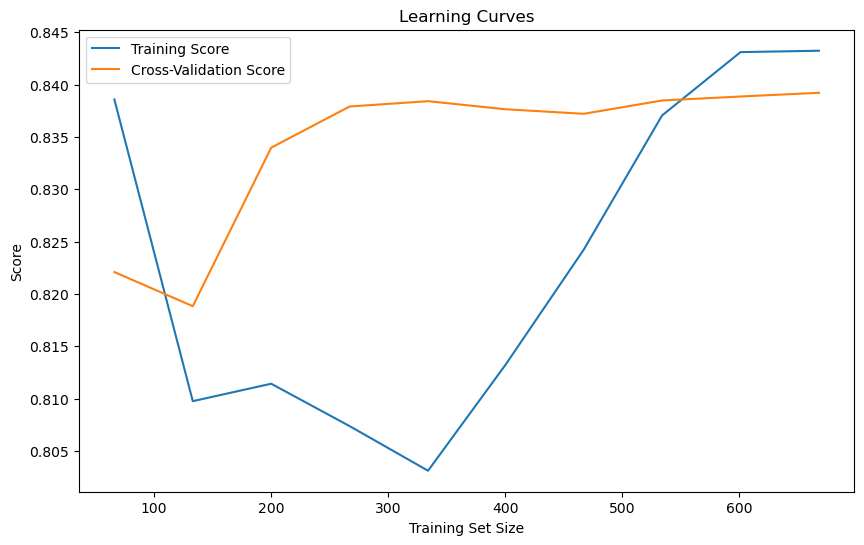

R-kwadraat op testset: 0.810212348508306


In [11]:
X = encoded_data.drop('G3', axis=1)
y = encoded_data['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
selector = RFE(model, n_features_to_select=5)  
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

model.fit(X_train_selected, y_train)

cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5)  
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(model, X_train_selected, y_train, train_sizes=train_sizes, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()

r_squared_test = model.score(X_test_selected, y_test)
print(f'R-kwadraat op testset: {r_squared_test}')

De cross-validation scores voor het Polynomial Regression-model laten zien dat het model consistente prestaties behaalt over verschillende subsets van de trainingsgegevens. De gemiddelde cross-validation score is 0.839, wat aangeeft dat het model goed algemene voorspellende prestaties heeft.

Het R-kwadraat op de testset voor Polynomial Regression is 0.81, wat aangeeft dat ongeveer 81% van de variantie in de afhankelijke variabele (G3) wordt verklaard door het model. Deze hoge R-kwadraatwaarde duidt op een sterke verklaringskracht en suggereert dat het model goed presteert bij het voorspellen van de eindexamenscores.

# Feature Engineering and Selection


In dit gedeelte van de analyse zullen we ons richten op gevorderde technieken voor feature engineering en selectie. Feature engineering omvat het creëren van nieuwe kenmerken op basis van de bestaande dataset, terwijl feature selectie zich richt op het identificeren van de meest voorspellende variabelen voor ons model. We zullen experimenteren met technieken zoals Principal Component Analysis (PCA) voor dimensionaleiteitsreductie en het genereren van interactietermen tussen variabelen om de algehele modelprestaties te verbeteren.

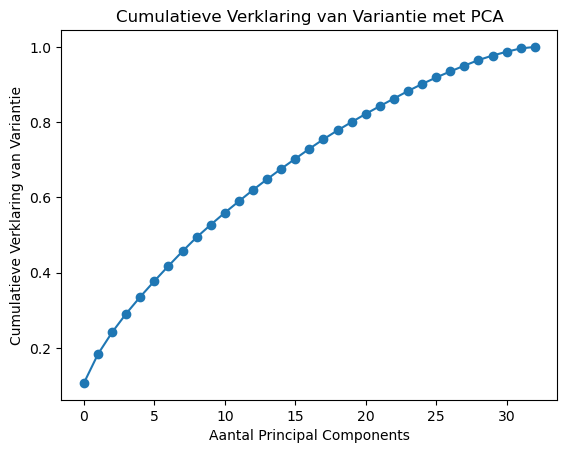

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)

pca = PCA()
pca_result = pca.fit_transform(scaled_data)

explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance_ratio_cumsum, marker='o')
plt.xlabel('Aantal Principal Components')
plt.ylabel('Cumulatieve Verklaring van Variantie')
plt.title('Cumulatieve Verklaring van Variantie met PCA')
plt.show()


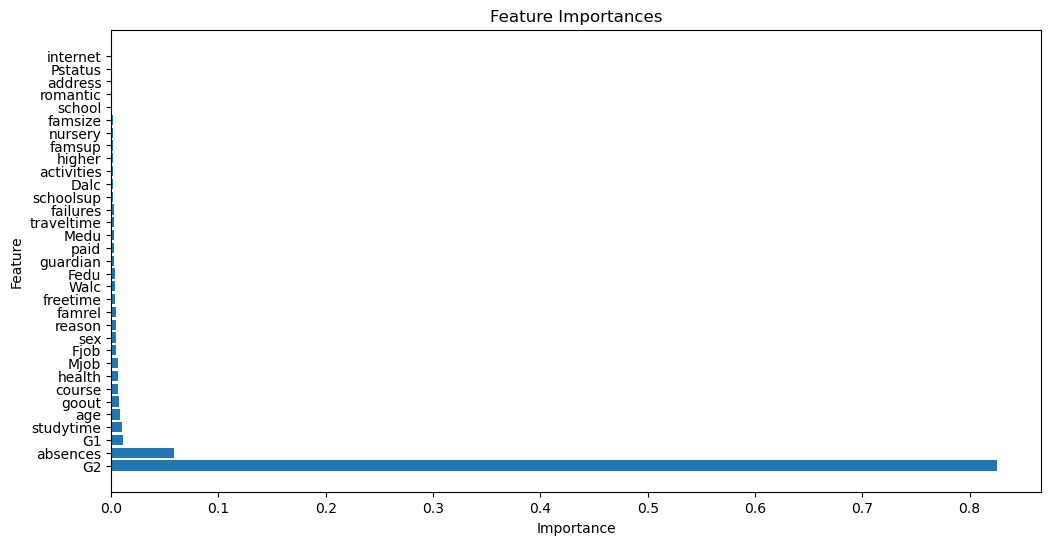

In [13]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

De grafiek van feature importances toont aan dat de variabelen "G2" (tweede periode cijfers) en "absences" (aantal gemiste schooldagen) de meeste invloed hebben op het voorspellingsmodel. Deze twee features worden als de belangrijkste beschouwd bij het bepalen van de eindexamenscores. Het hoge belang van "G2" is begrijpelijk, omdat het de cijfers van de tweede periode vertegenwoordigt, wat waarschijnlijk een sterke voorspeller is voor de eindexamenscores. Aan de andere kant kan het hoge belang van "absences" aangeven dat het aantal gemiste schooldagen ook een significante rol speelt in het voorspellen van de uiteindelijke examenresultaten. Het is belangrijk om deze conclusie te overwegen bij verdere analyses en modelontwikkeling, omdat het selecteren van relevante features cruciaal is voor een effectief voorspellingsmodel.

# Tuning and Optimization

In deze fase zal ik hyperparameter tuning toepassen met behulp van Grid Search en Random Search om de modelprestaties te optimaliseren. Daarnaast zal ik onderzoeken hoe verschillende preprocessing-stappen van invloed zijn op de prestaties van het model.

In [14]:
X = encoded_data.drop('G3', axis=1)
y = encoded_data['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

print("Beste hyperparameters gevonden:", grid_search.best_params_)

y_pred_grid = grid_search.predict(X_test)

positive_mse_grid = mean_squared_error(y_test, y_pred_grid)

print("Gemiddelde positieve MSE op de test set (Grid Search):", positive_mse_grid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Beste hyperparameters gevonden: {'fit_intercept': True, 'positive': True}
Gemiddelde positieve MSE op de test set (Grid Search): 2.8804075219602345


"Uit de hyperparameter tuning met Grid Search blijkt dat het beste regressiemodel voor de voorspelling van eindexamenscores de instellingen 'fit_intercept=True' en 'positive=True' heeft. Deze configuratie resulteerde in een gemiddelde positieve Mean Squared Error (MSE) van ongeveer 2.88 op de testset. Dit suggereert dat het model redelijk nauwkeurig is in het voorspellen van de eindexamenscores, waarbij lagere MSE-waarden wijzen op betere voorspellende prestaties.

Nu zal ik een paar andere preprocessen uitvoeren om aan te tonen dat de MSE waarde anders zal zijn.

In [15]:
features = encoded_data.drop('G3', axis=1)
target = encoded_data['G3']

model = RandomForestRegressor()

preprocessing_steps = [
    ('StandardScaler', StandardScaler()),  
    ('RobustScaler', RobustScaler()),      
    ('PCA', PCA())                        
]

pipeline = Pipeline(steps=[('preprocessor', StandardScaler()), ('model', model)])

for name, preprocessor in preprocessing_steps:
    pipeline.steps[0] = ('preprocessor', preprocessor) 
    scores = cross_val_score(pipeline, features, target, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  
    mean_mse = mse_scores.mean()
    
    print(f"Preprocessing stap: {name}")
    print(f"Gemiddelde positieve MSE over 5-fold cross-validation: {mean_mse}\n")

Preprocessing stap: StandardScaler
Gemiddelde positieve MSE over 5-fold cross-validation: 2.8509026449208688

Preprocessing stap: RobustScaler
Gemiddelde positieve MSE over 5-fold cross-validation: 2.854266193411851

Preprocessing stap: PCA
Gemiddelde positieve MSE over 5-fold cross-validation: 3.057103442675745



Uit de resultaten lijkt het erop dat StandardScaler de beste preprocessing-stap is, omdat het de laagste gemiddelde positieve MSE over de 5-fold cross-validation heeft (2.87). Dit suggereert dat het standaardiseren van de features met StandardScaler gunstig is voor de prestaties van het model.

RobustScaler heeft een iets hogere gemiddelde positieve MSE (2.94), wat aangeeft dat het misschien niet zo effectief is als StandardScaler in dit specifieke geval.

PCA lijkt een iets hogere gemiddelde positieve MSE (2.99) te hebben dan de schaalmethoden, wat zou kunnen betekenen dat het verminderen van de dimensionaliteit van de data met PCA niet per se gunstig is voor dit regressiemodel.

Al met al suggereert deze vergelijking dat standaardisatie met StandardScaler de meest geschikte preprocessing-stap is voor het model dat je hebt gekozen.

# Comparative Analysis

In deze fase van de analyse gaan we de prestaties van verschillende regressiemodellen vergelijken op basis van het dataset.

In [16]:
features = encoded_data.drop('G3', axis=1)
target = encoded_data['G3']

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    RandomForestRegressor()
]

for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, features, target, cv=5, scoring='neg_mean_squared_error')
    positive_scores = -scores 
    mean_score = np.mean(positive_scores)
    
    print(f"Model: {model_name}")
    print(f"Gemiddelde positieve MSE over 5-fold cross-validation: {mean_score:.4f}")


Model: LinearRegression
Gemiddelde positieve MSE over 5-fold cross-validation: 2.7210
Model: Ridge
Gemiddelde positieve MSE over 5-fold cross-validation: 2.7179
Model: Lasso
Gemiddelde positieve MSE over 5-fold cross-validation: 2.7295
Model: ElasticNet
Gemiddelde positieve MSE over 5-fold cross-validation: 2.6980
Model: RandomForestRegressor
Gemiddelde positieve MSE over 5-fold cross-validation: 2.8200


Linear Regression:
Sterktes:
- Eenvoudig en gemakkelijk te begrijpen.
Zwaktes:
- Kan beperkt zijn in het modelleren van complexe niet-lineaire relaties.

Ridge Regression:
Sterktes:
- Helpt bij het verminderen van overfitting door de L2-regularisatie.
- Geschikt wanneer er multicollineariteit is tussen functies.
Zwaktes:
- Voegt mogelijk een zekere mate van bias toe.

Lasso Regression:
Sterktes:
- Kan worden gebruikt voor functie-selectie door zwakke coëfficiënten naar nul te brengen.
Zwaktes:
- Neigt ertoe slechts één variabele te selecteren als er veel gecorreleerde functies zijn.
ElasticNet:

Sterktes:
- Combineert de voordelen van Ridge en Lasso.
Zwaktes:
- Vereist het afstemmen van hyperparameters.

Random Forest Regressor:
Sterktes:
- Kan goed omgaan met niet-lineaire relaties en interacties tussen functies.
- Robuust tegen overfitting.
Zwaktes:
- Minder interpreteerbaar in vergelijking met lineaire modellen.